# Assignment 1

In [8]:
name = "Maksimov Aleksandr Evgen'evich"
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [25]:

def myFun(*argv):
    for arg in argv:
        print(arg)

myFun('Python', 'is', 'amazing')

Python
is
amazing


In [27]:
square = lambda x: x ** 2
print(square(10))

100


In [30]:
def calculate_area(length, width=10):
    area = length * width
    print(f"Area of rectangle: {area}")

calculate_area(10)
calculate_area(10, 8)

Area of rectangle: 100
Area of rectangle: 80


## Exercise 1


In [44]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    if n <= 1:
        return False

    for i in range(2, n):

        if n % i == 0:
            return False

    return True
pass

print(is_prime(17))
    

True


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [48]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """

class A(object): 
	pass
class B(A): 
	pass
class C(B): 
	pass

print(inspect.getmro(C)) 

(<class '__main__.C'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>)


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [146]:
from datetime import datetime
from time import sleep
import time
 
# wrong function
def my_time():
    c = datetime.now()
    time.sleep(1)
    t = datetime.now()
    print(c)  
    print(t)    
    pass

In [149]:
# simple tests :)
print(my_time())
time.sleep(2)
print(my_time())

2025-01-23 22:20:13.925026
2025-01-23 22:20:14.925780
None
2025-01-23 22:20:16.928053
2025-01-23 22:20:17.928874
None


## Exercise 4

In [6]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
def fun(max):
    cnt = 1
    while cnt <= max:
        yield cnt
        cnt += 1

ctr = fun(15)
for n in ctr:
    print(n)   
     # your code here    
  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [153]:
n = 5

for i in range(1, n+1):
    for j in range(0, n-i+1):
        print(' ', end='')

    C = 1
    for j in range(1, i+1):

        print(' ', C, sep='', end='')

        C = C * (i - j) // j
    print()

      1
     1 1
    1 2 1
   1 3 3 1
  1 4 6 4 1


## Exercise 6


In [21]:
import pathlib  # can change to os module if you want
import sys
import os.path
def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """

    raise NotImplementedError

import os
path = "C://Users//User//Desktop//Python"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)
for i in dir_list:
    print(i)
    print(os.path.getsize(path))
    #os.path.getsize

Files and directories in ' C://Users//User//Desktop//Python ' :
['.conda', '15.10.2024.txt', 'example_1.py', 'for 2 lec.ipynb', 'Home work 1', 'HW', 'hw1', 'pract.ipynb', 'Practics №1 eng.docx', 'Practics №1 eng.pdf', 'Way to repository.txt', 'дополнительные задания (олимпиада) по питону.txt', 'Сравнение таблиц.ipynb']
.conda
4096
15.10.2024.txt
4096
example_1.py
4096
for 2 lec.ipynb
4096
Home work 1
4096
HW
4096
hw1
4096
pract.ipynb
4096
Practics №1 eng.docx
4096
Practics №1 eng.pdf
4096
Way to repository.txt
4096
дополнительные задания (олимпиада) по питону.txt
4096
Сравнение таблиц.ipynb
4096


In [17]:
import os.path

os.path.getsize(path)

4096

## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [17]:
def merge_sorter(*args):
    # your code here
    raise NotImplementedError

## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [18]:
def profiler():
    # your code here
    raise NotImplementedError

def ackermann(n, m):
    # your code here
    raise NotImplementedError

## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [19]:
def encode(sequence):
    # your code here
    raise NotImplementedError

## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [42]:
n = 10
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)
for i in range(1, n):
    print(fibonacci(i))

1
1
2
3
5
8
13
21
34


In [3]:
fib = [0,1]
n = int(input())
for i in range(2,n):
  fib.append(fib[i-1]+fib[i-2])

pairs = []

for i in range(n-1):
  pairs.append([fib[i],fib[i+1]])

print(pairs)



[[0, 1], [1, 1], [1, 2], [2, 3], [3, 5], [5, 8], [8, 13], [13, 21], [21, 34], [34, 55], [55, 89], [89, 144], [144, 233], [233, 377]]


Matplotlib is building the font cache; this may take a moment.


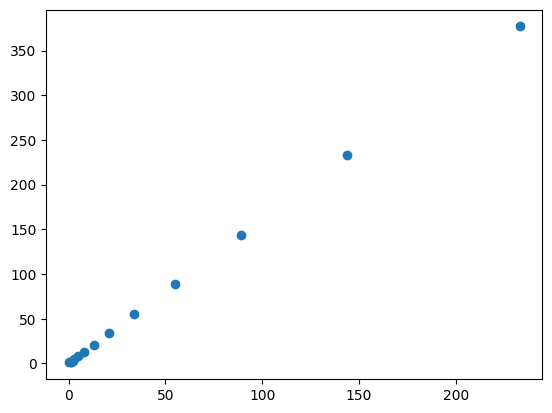

In [15]:
import matplotlib.pyplot as plt
import numpy as np

pairs = np.array(pairs)

plt.scatter(pairs[:,0],pairs[:,1])
plt.show()

In [21]:
def visualizer(func):
    # your code here
    raise NotImplementedError

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [22]:
def memoizer(func):
    # your code here
    raise NotImplementedError

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [23]:
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]